# Infor

1. Following the protocol of data collector, the scenario distribution for cut-in case can only be accessed by reseanable request for now.

2. To reproduce the figures, please download the results from 
https://drive.google.com/file/d/11uOygVF7MAphVHqPobqq9A42c7u4jjih/view?usp=sharing

In [1]:
import sys
sys.path.append("../../")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

from examples.cutin.cutin import value_function_IDM, value_function_FVDM 

In [7]:
plt.rcParams.update({'font.size': 16})

# 1. Response function and input 

In [4]:
def f_h(x):
    x = np.array(x)
    if x.ndim == 1:
        return value_function_IDM(x, dt=0.2, STEP=50)
    if x.ndim == 2:
        return np.array([value_function_IDM(i, dt=0.2, STEP=50) for i in x])

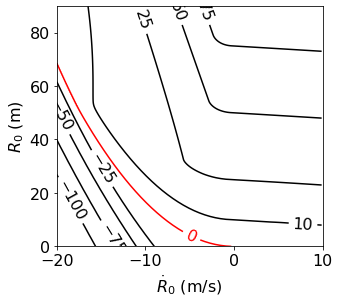

In [8]:
x = np.arange(-20,10,0.1) # this is rate
y = np.arange(0, 90,0.2)   # this is range
x_mesh, y_mesh = np.meshgrid(x, y)

z_h = np.array([[f_h([j,i]) for i in x] for j in y])

plt.figure(figsize=(5,4.5))
cs1 = plt.contour(x_mesh, y_mesh, z_h, levels=[-100, -75, -50, -25, 10, 25, 50, 75], 
                  colors='black', linestyles='solid')
cs2 = plt.contour(x_mesh, y_mesh, z_h, levels=[0], colors='red', linestyles='solid')
plt.clabel(cs1)
plt.clabel(cs2)
plt.xlabel('$\dot{R}_{0}$ (m/s)')
plt.ylabel('$R_{0}$ (m)')
plt.xticks([-20,-10,0,10])
plt.tight_layout()
plt.savefig('figures/f_h_contour.pdf')
plt.show()

Please reach the author for input data

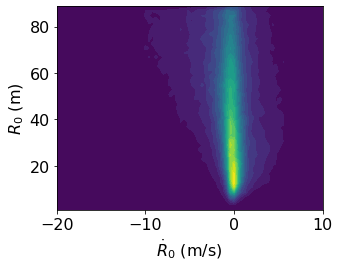

In [28]:
# raw_prob = np.loadtxt(open("cutin_table.csv", "rb"), delimiter=",", skiprows=1)

# range_rate = np.arange(-20, 10.1, 0.4)
# range_ = raw_prob[:,0]
# raw_prob = raw_prob[:,1:]
# range_rata_mesh, range_mesh = np.meshgrid(range_rate , range_)


# plt.figure(figsize=(5,4))
# cs = plt.contourf(range_rata_mesh, range_mesh, raw_prob, levels = 20)
# plt.xlabel('$\dot{R}_0$ (m/s)')
# plt.ylabel('$R_0$ (m)')
# plt.tight_layout()
# #plt.savefig('figures/input.pdf')
# plt.show()

# 2. Results

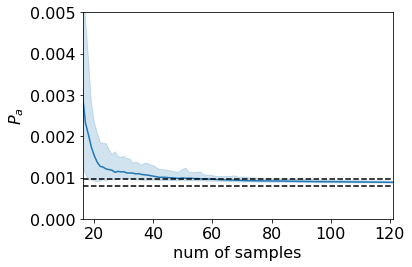

In [36]:
results = np.load('results/sf.npy')

plt.figure()
plt.plot(np.arange(16, 161), np.median(results, axis=0))
plt.fill_between(np.arange(16, 161), np.percentile(results, 15, axis=0),
                 np.percentile(results, 85, axis=0),
                 alpha=0.2, color='tab:blue')

plt.plot(np.arange(16, 161), [0.00087 * 1.1] * len(np.arange(16, 161)), 'k--')
plt.plot(np.arange(16, 161), [0.00087 * 0.9] * len(np.arange(16, 161)), 'k--')
plt.xlabel('num of samples')
plt.ylabel('$P_a$')
plt.xlim(16, 121)
plt.xticks(np.arange(20, 121, 20))
plt.ylim(0, 0.005)
plt.tight_layout()
plt.savefig('figures/convergence_sf.pdf')
plt.show()